In [92]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 


In [93]:
from keras.models import load_model
from kerasAC.metrics import recall, specificity, fpr, fnr, precision, f1
from kerasAC.custom_losses import ambig_binary_crossentropy, ambig_mean_squared_error
import pickle 
from kerasAC.generators import * 

In [94]:
#in /mnt/lab_data, SNPs have been split by DL CV split 
snp_prefix="/mnt/lab_data2/annashch/alzheimers_parkinsons/dl_interpret/"
n_folds=10 
num_tasks=1 
all_snps_basename="chr17-only_dbsnp151_common_MAPT_HaplotypeRegion.txt"
ref_fasta="/mnt/data/annotations/by_release/hg38/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta"
model_prefix="/mnt/lab_data3/soumyak/adpd/deeplearning/models/regression/PD_CTRL_MDTG.model."

In [95]:
for fold in [7]: 
    print(fold)
    #load the model
    custom_objects={"recall":recall,
                    "sensitivity":recall,
                    "specificity":specificity,
                    "fpr":fpr,
                    "fnr":fnr,
                    "precision":precision,
                    "f1":f1,
                    "ambig_binary_crossentropy":ambig_binary_crossentropy,
                    "ambig_mean_squared_error":ambig_mean_squared_error}
    model=load_model(model_prefix+str(fold),custom_objects=custom_objects)
    print("loaded model")
    #get reference allele predictions 
    snp_file='/'.join([snp_prefix,all_snps_basename])+'.'+str(fold)
    snps=pd.read_csv(snp_file,header=0,sep='\t')
    snp_ref_generator=SNPGenerator(data_path=snp_file,
                                   ref_fasta=ref_fasta,
                                   allele_col="REF")
    snp_ref_predictions=model.predict_generator(snp_ref_generator,
                                                max_queue_size=5000, 
                                                workers=40, 
                                                use_multiprocessing=True,
                                                verbose=1)
    print("got snp ref predictions")
    #get alternate allele predictions 
    snp_alt_generator=SNPGenerator(snp_file,
                                   ref_fasta=ref_fasta,
                                   allele_col="ALT")

    snp_alt_predictions=model.predict_generator(snp_alt_generator,
                                                max_queue_size=5000, 
                                                workers=40, 
                                                use_multiprocessing=True, verbose=1)
    print("got snp alt predictions")
    

7
loaded model
loaded labels
set index to CHR, START, END
filtered on chroms_to_use
data.shape:(12413, 6)
97/97 [==============================] - 10s 101ms/step
got snp ref predictions
loaded labels
set index to CHR, START, END
filtered on chroms_to_use
data.shape:(12413, 6)
97/97 [==============================] - 6s 60ms/step
got snp alt predictions


In [96]:
snp_ref_predictions.shape

(12413, 1)

In [97]:
snp_alt_predictions.shape

(12413, 1)

In [98]:
snp_ref_generator.data['ref_pred']=snp_ref_predictions
snp_ref_generator.data['alt_pred']=snp_alt_predictions

In [99]:
snp_ref_generator.data.to_csv("MAPT_SNP_Ref_vs_Alt_predictions.txt",sep='\t')

In [100]:
import pandas as pd 
snp_predictions=pd.read_csv("MAPT_SNP_Ref_vs_Alt_predictions.txt",header=0,sep='\t')
snp_predictions

,CHR,START,END,ID,REF,ALT,QUAL,FILTER,INFO,ref_pred,alt_pred
0,chr17,45465841,45465842,rs62065396,T,C,.,.,RS=62065396;RSPOS=45465841;dbSNPBuildID=129;SS...,0.044768,0.046862
1,chr17,45466206,45466207,rs146474745,A,G,.,.,RS=146474745;RSPOS=45466206;dbSNPBuildID=134;S...,0.068321,0.061056
2,chr17,45466223,45466224,rs528188735,CT,C,.,.,RS=528188735;RSPOS=45466224;dbSNPBuildID=142;S...,0.078684,0.078684
3,chr17,45466223,45466224,rs367902572,CT,C,.,.,RS=367902572;RSPOS=45466225;dbSNPBuildID=138;S...,0.078684,0.078684
4,chr17,45466299,45466300,rs8077198,T,C,.,.,RS=8077198;RSPOS=45466299;dbSNPBuildID=116;SSR...,0.120176,0.125312
5,chr17,45466464,45466465,rs2521819,T,C,.,.,RS=2521819;RSPOS=45466464;RV;dbSNPBuildID=100;...,0.023718,0.023474
6,chr17,45466552,45466553,rs189618211,T,C,.,.,RS=189618211;RSPOS=45466552;dbSNPBuildID=135;S...,0.012465,0.012470
7,chr17,45466840,45466841,rs2959992,G,C,.,.,RS=2959992;RSPOS=45466840;dbSNPBuildID=101;SSR...,0.007230,0.007379
8,chr17,45466874,45466875,rs551875800,A,T,.,.,RS=551875800;RSPOS=45466874;dbSNPBuildID=142;S...,0.010104,0.009773
9,chr17,45466888,45466889,rs570241621,A,G,.,.,RS=570241621;RSPOS=45466888;dbSNPBuildID=142;S...,0.008522,0.007159


In [108]:
import plotnine
from plotnine import * 

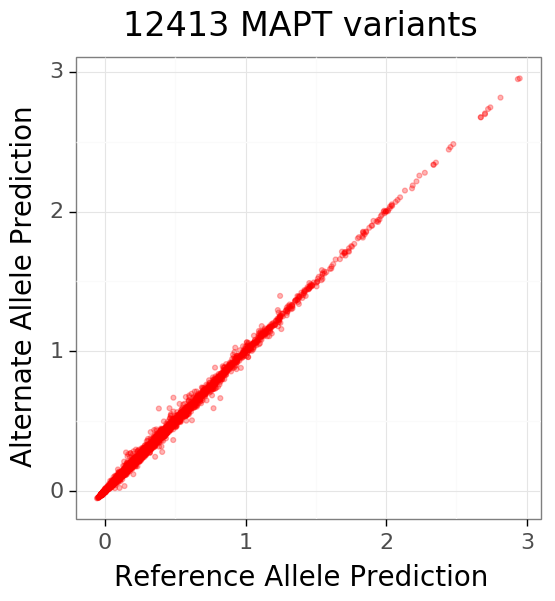

<ggplot: (-9223363258391958121)>

In [109]:
plotnine.options.figure_size = (6,6)
(ggplot(snp_predictions,
        aes(x="ref_pred",y="alt_pred",label='ID'))+
geom_point(alpha=0.3,color='red')+
theme_bw(20)+
xlab("Reference Allele Prediction")+
ylab("Alternate Allele Prediction")+
ggtitle("12413 MAPT variants"))


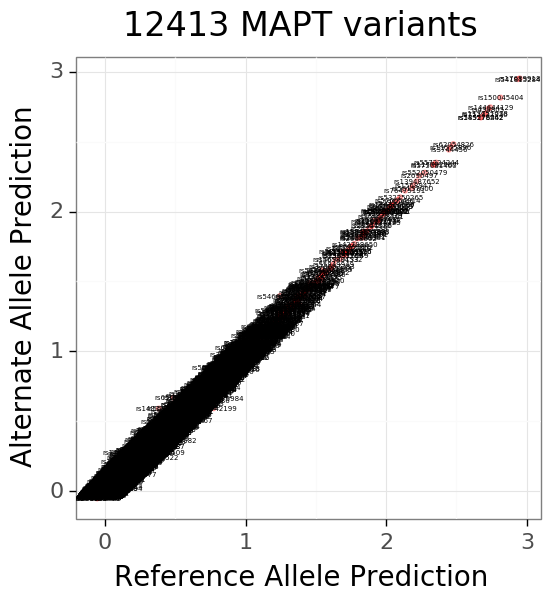

<ggplot: (8778462854201)>

In [110]:
plotnine.options.figure_size = (6,6)
(ggplot(snp_predictions,
        aes(x="ref_pred",y="alt_pred",label='ID'))+
geom_point(alpha=0.3,color='red')+
 geom_text(size=5)+
theme_bw(20)+
xlab("Reference Allele Prediction")+
ylab("Alternate Allele Prediction")+
ggtitle("12413 MAPT variants"))


In [111]:
snp_predictions['delta']=snp_predictions['alt_pred']-snp_predictions['ref_pred']

In [112]:
snp_predictions_sorted=snp_predictions.sort_values(by=['delta'])

In [113]:
snp_predictions_sorted.head()

,CHR,START,END,ID,REF,ALT,QUAL,FILTER,INFO,ref_pred,alt_pred,delta
143,chr17,45478659,45478660,rs111742199,T,C,.,.,RS=111742199;RSPOS=45478659;dbSNPBuildID=132;S...,0.772797,0.593581,-0.179217
409,chr17,45501558,45501559,rs149575984,G,A,.,.,RS=149575984;RSPOS=45501558;dbSNPBuildID=134;S...,0.821041,0.665714,-0.155327
6260,chr17,45953734,45953735,rs183004509,A,G,.,.,RS=183004509;RSPOS=45953734;dbSNPBuildID=135;S...,0.407877,0.280992,-0.126885
574,chr17,45518782,45518783,rs544718682,G,A,.,.,RS=544718682;RSPOS=45518782;dbSNPBuildID=142;S...,0.486234,0.366162,-0.120073
2792,chr17,45722444,45722445,rs76667867,G,"A,C",.,.,RS=76667867;RSPOS=45722444;dbSNPBuildID=132;SS...,0.619304,0.507237,-0.112067


In [114]:
snp_predictions_sorted.tail()

,CHR,START,END,ID,REF,ALT,QUAL,FILTER,INFO,ref_pred,alt_pred,delta
2528,chr17,45705590,45705591,rs149367053,CTG,C,.,.,RS=149367053;RSPOS=45705591;dbSNPBuildID=134;S...,0.150643,0.277658,0.127015
6727,chr17,45986927,45986928,rs558531243,C,G,.,.,RS=558531243;RSPOS=45986927;dbSNPBuildID=142;S...,0.459757,0.593799,0.134042
12202,chr17,46765939,46765940,rs546015780,G,A,.,.,RS=546015780;RSPOS=46765939;dbSNPBuildID=142;S...,1.245978,1.396727,0.150749
2278,chr17,45688515,45688516,rs6503443,T,C,.,.,RS=6503443;RSPOS=45688515;dbSNPBuildID=116;SSR...,0.487454,0.668864,0.181410
506,chr17,45507973,45507974,rs149327443,C,"A,T",.,.,RS=149327443;RSPOS=45507973;dbSNPBuildID=134;S...,0.383970,0.591414,0.207444
